In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

In [7]:
points = [
    [0., 0.],
    [0., .16],
    [.85, -.04],
    [.05, .85],
    [0., 1.6],
    [.2, .23],
    [-.26, .22],
    [0., 1.6],
    [-.15, .26],
    [.28, .24],
    [0., .44]
]

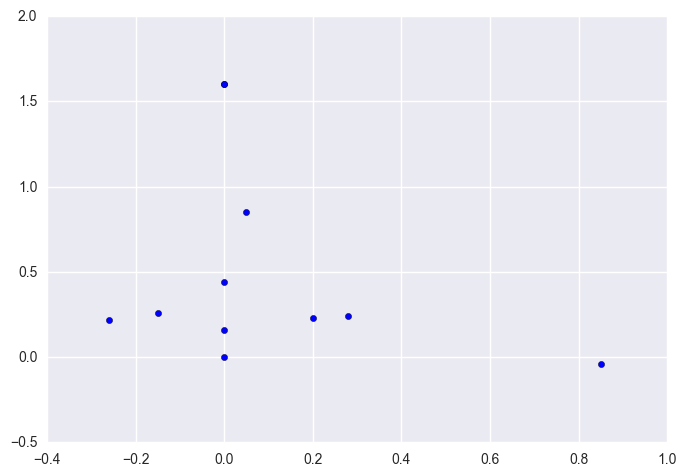

In [8]:
plt.scatter(*zip(*points))